<a href="https://colab.research.google.com/github/Amit-Singh-Rajput/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Solution_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#csv file location
path = '/content/drive/MyDrive/AlmaBetter/Project/Airbnb NYC 2019.csv'

**Reading Data and Storing into Datafram**

In [4]:
airbnb_df = pd.read_csv(path)

**Exploring Dataset**

In [5]:
#Checking top 5 rows of dataset
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Checking bottom 5 rows of dataset
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
#Getting Information of dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#Checking size of dataframe
airbnb_df.shape

(48895, 16)

In [9]:
#Checking Columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Summary of the Dataset**

In [10]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
#Creating copy of dataset before working with it so that original data remains untouched
df = airbnb_df.copy()

## **DATA CLEANING**

**Checking for Null Values**

In [12]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Removing Duplicates If Any**

In [13]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

**Dropping Down the Unnecessary Columns**

In [14]:
df.drop(['id','name','last_review'],axis=1, inplace=True)

In [15]:
#Examining Changes
df.head()

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [16]:
#size after dealing with null values and duplicates
df.shape

(48895, 13)

## **DATA VISUALIZATION**

**Correlation Between Different Variables**

In [17]:
df.corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

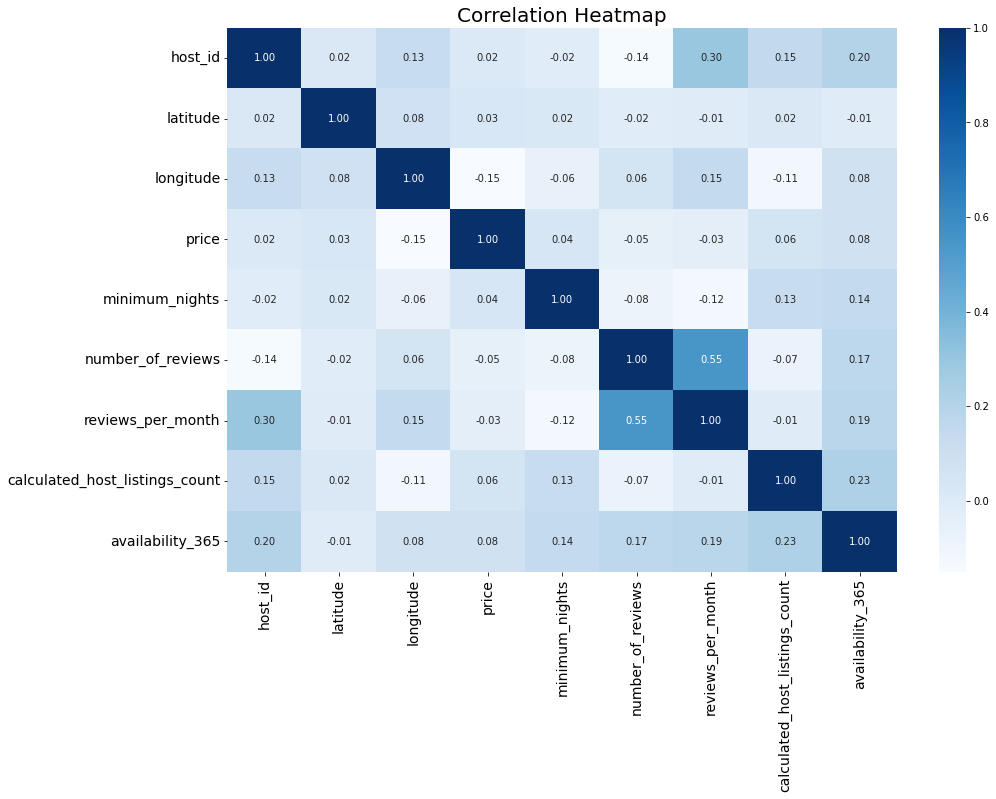

In [18]:
#Creating Heatmap of above correlation matrix so that it is easy to read and understand
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Correlation Heatmap',fontsize=20)

# **Which is the Most Booked Neighbourhood Group?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


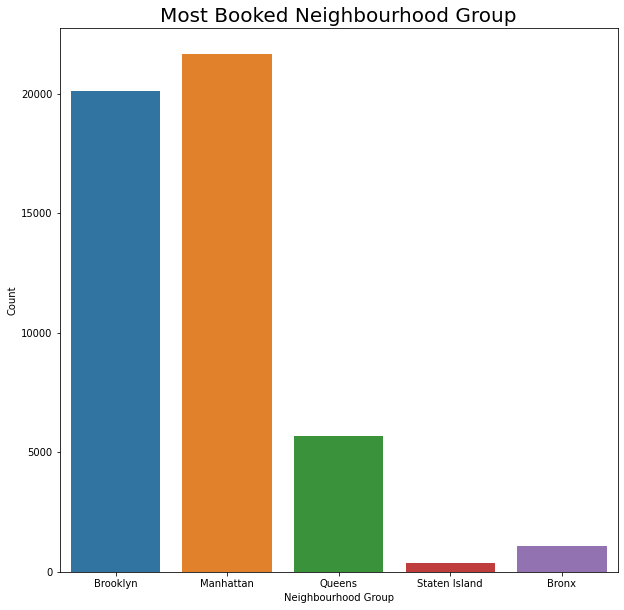

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(df['neighbourhood_group'])
plt.title('Most Booked Neighbourhood Group',fontsize=20)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

**Most Booked Neighbourhood Group in Percentage**

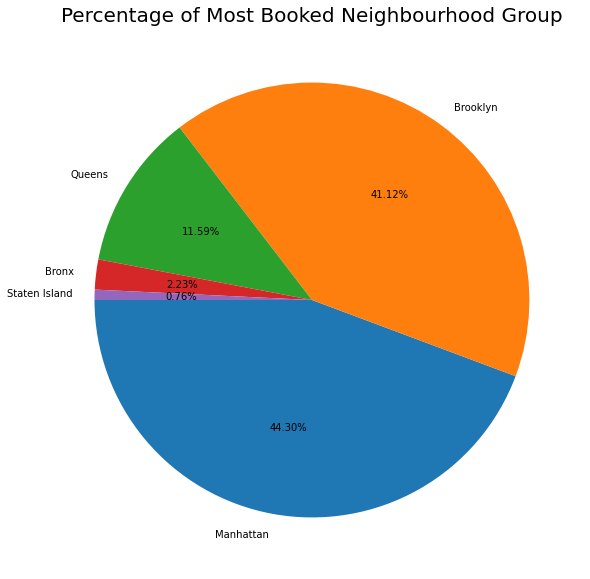

In [20]:
plt.figure(figsize=(12,10))
plt.pie(df['neighbourhood_group'].value_counts(), labels=df['neighbourhood_group'].value_counts().keys(),autopct='%0.2f%%', startangle=180)
plt.title('Percentage of Most Booked Neighbourhood Group',fontsize=20)
plt.show()

**Inference**


*   Manhattan has the most number of listings, followed by Brooklyn.
*   Staten Island has the least number of listings.


## **Which Type of Rooms are occupied the most?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


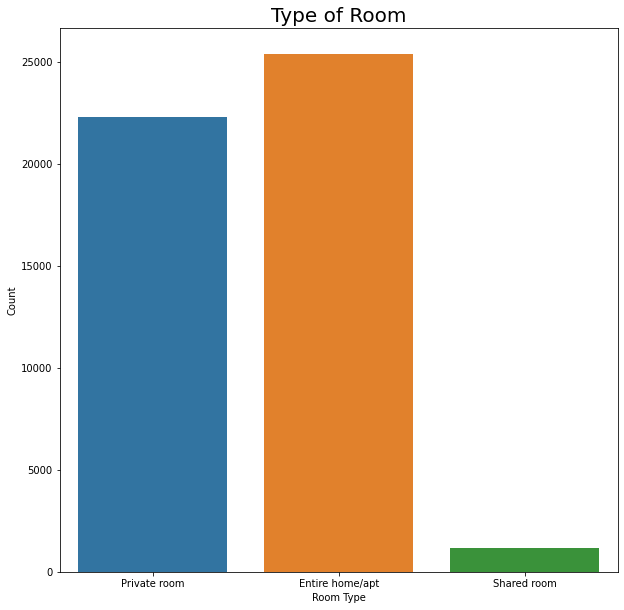

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(df['room_type'])
plt.title('Type of Room',fontsize=20)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

**Inference**


*   The Entire Home/Apartment has the highest share, followed by the Private Room and the least preferred is Shared Room.



# **Finding the Busiest Host**

**1. On the basis of Host Name**


In [22]:
top_10_host = df['host_name'].value_counts().head(10)
top_10_host

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

In [23]:
top_10_host_df = pd.DataFrame(top_10_host)
top_10_host_df.reset_index(inplace=True)
top_10_host_df.rename(columns={'index':'host_name','host_name':'count'},inplace=True)
top_10_host_df


,host_name,count
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


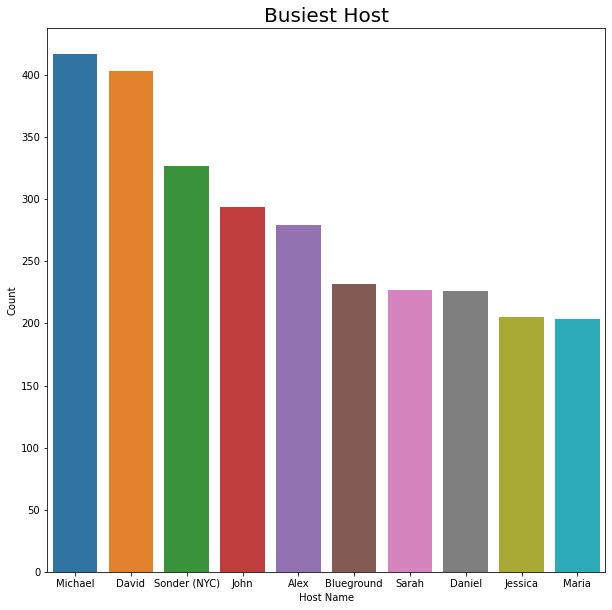

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='host_name',y='count',data=top_10_host_df)
plt.title('Busiest Host',fontsize=20)
plt.xlabel('Host Name')
plt.ylabel('Count')
plt.show()

**Inference**


*   Michael(417) is the busiest host among all, followed by David(403) and Sonder(327).


**2. Busiest Host According to Number of Review**

In [25]:
busy_host = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max()
busy_host = busy_host.reset_index()
busy_host = busy_host.sort_values(by='number_of_reviews',ascending=False).head(10)
busy_host

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


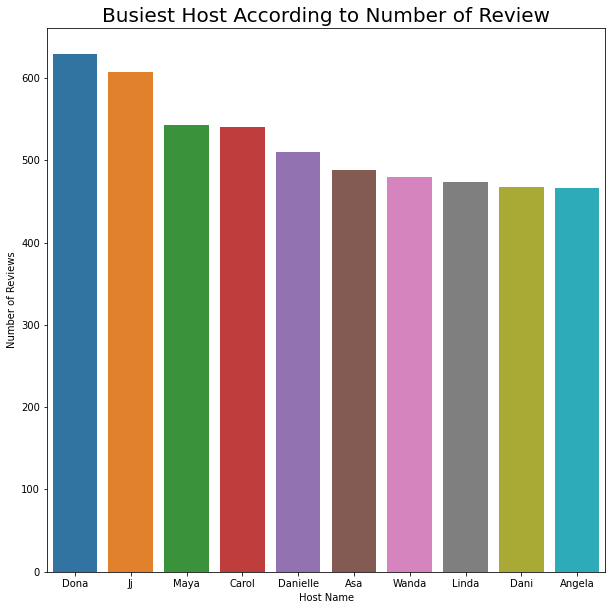

In [26]:
#Visualizing Data
plt.figure(figsize=(10,10))
sns.barplot(x='host_name',y='number_of_reviews',data=busy_host)
plt.title('Busiest Host According to Number of Review',fontsize=20)
plt.xlabel('Host Name')
plt.ylabel('Number of Reviews')
plt.show()

**Inference**

Dona has the received most number of reviews which is 629, followed by JJ(607). Which tells us that people are loving their stay there.

# **Types of Rooms Occupied by Neighbourhood**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


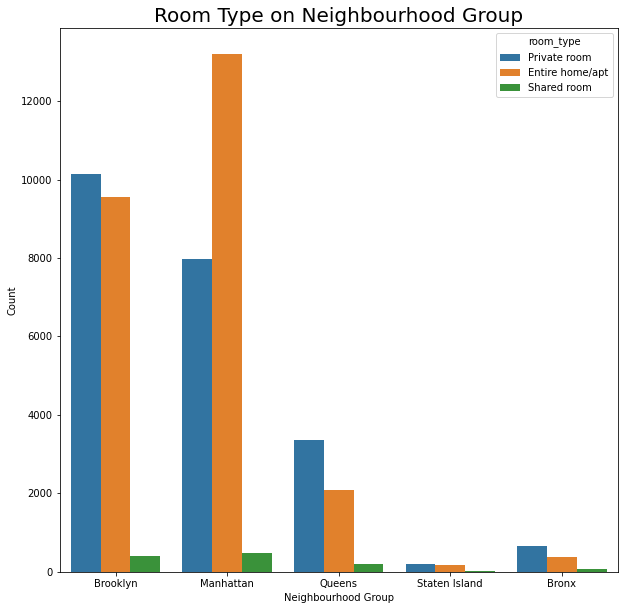

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(df.neighbourhood_group,hue=df.room_type)
plt.title('Room Type on Neighbourhood Group',fontsize=20)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

**Inference**


*   The graph shows that the Entire Home/Apartment is listed most near Manhattan and Private rooms and Apartment near Brooklyn are nearly equal.



# **Neighbourhood Group Price Distribution**

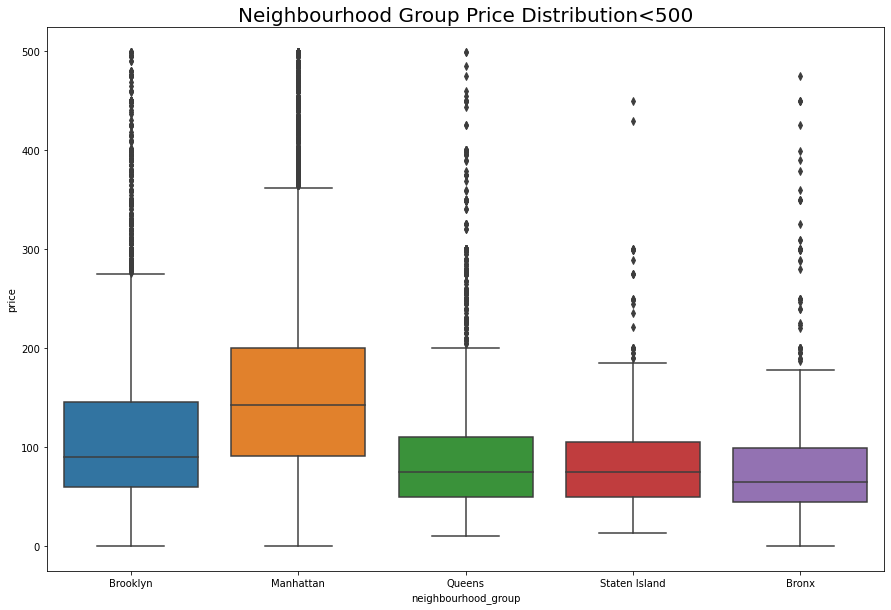

In [28]:
plt.figure(figsize=(15,10))
sns.boxplot(y='price', x='neighbourhood_group', data=df[df.price<500])
plt.title('Neighbourhood Group Price Distribution<500',fontsize=20)
plt.show()

**Inference**



From the above boxplot we can say that
  

1.   Manhattan has the highest range price for listings with about 140 as an avg price, followed by Brooklyn with $90 per night.
2.   Queens and Staten Island seem to have very similar distribution.
3.   The Bronx is the cheapest.







# **Map of Neighbourhood Group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


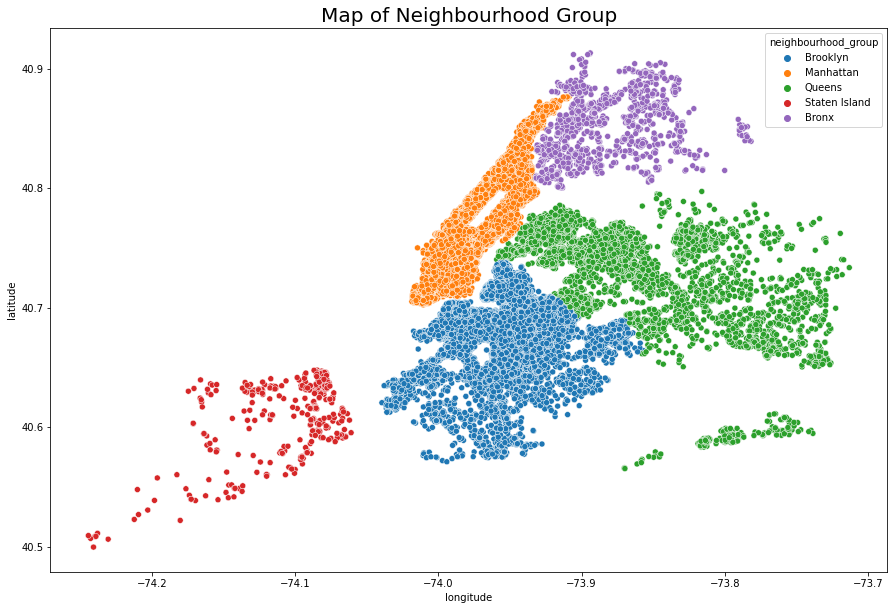

In [29]:
#Visualizing Neighbourhood Group Location
plt.figure(figsize=(15,10))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.title("Map of Neighbourhood Group",fontsize=20)
plt.ioff()

# **Room Type Location Per Neighbourhood Group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


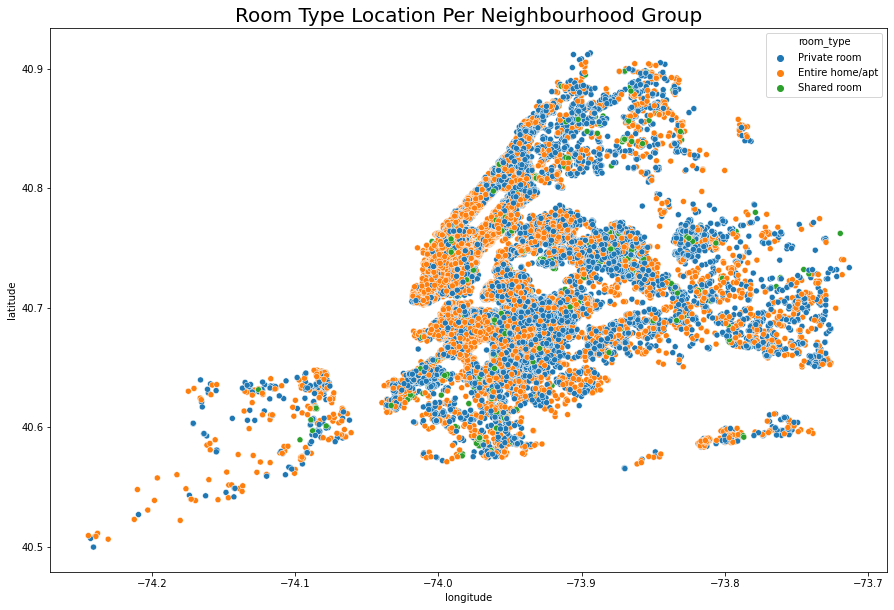

In [30]:
#Visualizing Room Type Location Per Neighbourhood Group
plt.figure(figsize=(15,10))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.title("Room Type Location Per Neighbourhood Group",fontsize=20)
plt.ioff()

**Inference**

From above mapping, we can say that Shared Rooms are fewer when compared to Private Room and Entire Homes/Apartments.

# **Neighbourhood Group and Availability of Room**

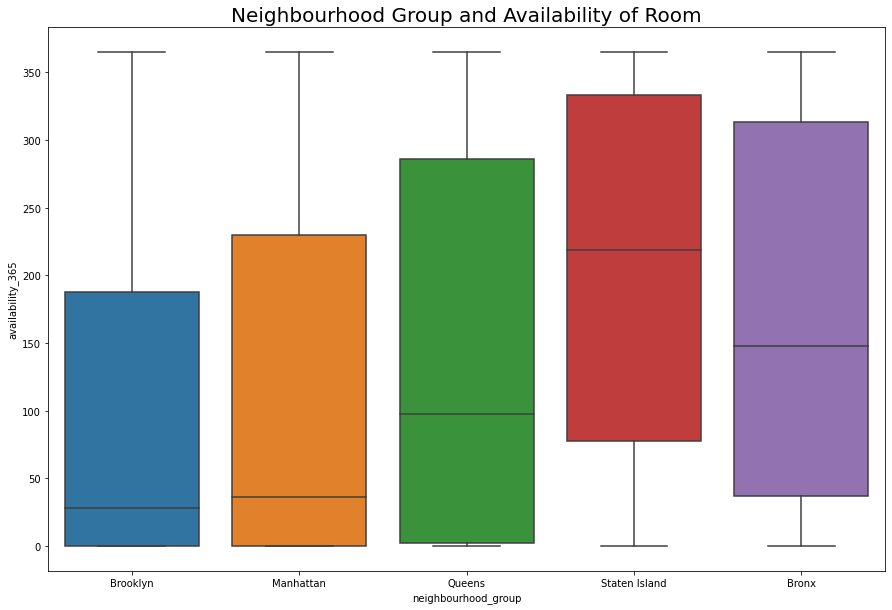

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365')
plt.title("Neighbourhood Group and Availability of Room",fontsize=20)
plt.show()

**Inference**

From the above boxplot we can say that the Staten Island has 225 days avg availability which is more availability than the rest.



# **Neighbourhood with Maximum Number of Reviews**

In [32]:
area_review = df.groupby(['neighbourhood_group'])['number_of_reviews'].max()
area_review = area_review.reset_index()
print(area_review)

  neighbourhood_group  number_of_reviews
0               Bronx                321
1            Brooklyn                488
2           Manhattan                607
3              Queens                629
4       Staten Island                333


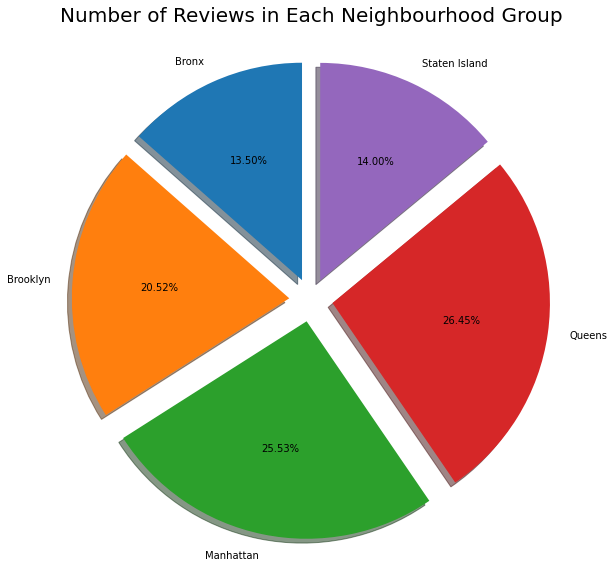

In [33]:
#Visualizing the number of reviews in each neighbourhood group
plt.figure(figsize=(15,10))
reviews = area_review['number_of_reviews']
plt.pie(reviews, labels=area_review['neighbourhood_group'],autopct='%0.2f%%',startangle=90,explode=[0.1,0.1,0.1,0.1,0.1],shadow=True)
plt.title('Number of Reviews in Each Neighbourhood Group',fontsize=20)
plt.show()

**Inference**

Pie Chart shows that Queens has the most number of review which 26.45% followed by Manhattan which has 25.53% review. This means that people are enjoying their stay in these places.

## **Price of Room**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


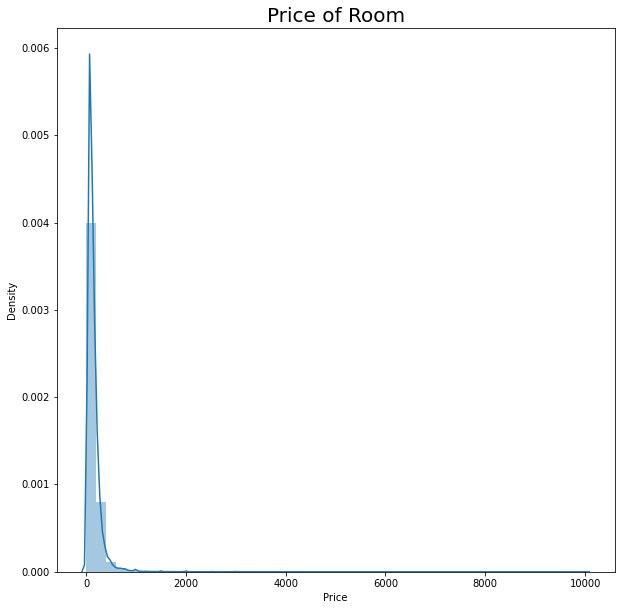

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(df.price)
plt.title('Price of Room',fontsize=20)
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**Observation**

1.   Most of the Prices are ranging between 0 to 1000.
2.   There are some property which has a price listed as zero which is quite unusual.


**Property listed with Price Zero**

In [35]:
zero_price_property = df.loc[df.price==0]
zero_price_property

,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,1,0
26841,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [36]:
zero_price_property.shape

(11, 13)

**Inference**

Here we can see that there are 11 property which has zero price.

# **Relation Between Prices and Number of Reviews**

In [37]:
area_price = df.groupby(['price'])['number_of_reviews'].max().reset_index()
area_price.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


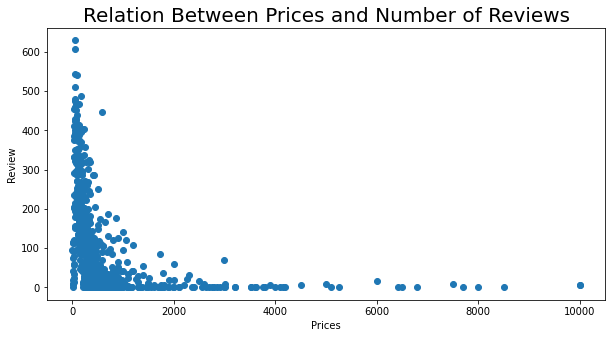

In [38]:
Prices = area_price['price']
Review = area_price['number_of_reviews']
fig = plt.figure(figsize=(10,5))
plt.scatter(Prices,Review)
plt.title('Relation Between Prices and Number of Reviews',fontsize=20)
plt.xlabel('Prices')
plt.ylabel('Review')
plt.show()

**Inference**

Scatter Plot shows that people are more attracted to lower prices.

## **Does the Number of Reviews Affect the Price**

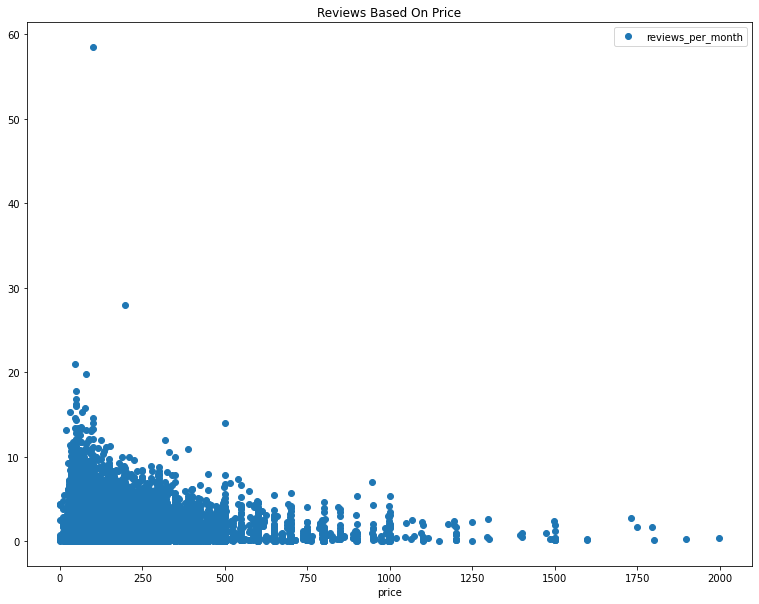

In [39]:
price_review = df[['reviews_per_month','price']].sort_values(by='price')
price_review = price_review.loc[price_review['reviews_per_month']>0]
price_review = price_review.loc[price_review['price']<2000]
price_review.plot(x='price', y='reviews_per_month', style='o', title='Reviews Based On Price',figsize=(13,10))

<Figure size 1080x720 with 0 Axes>

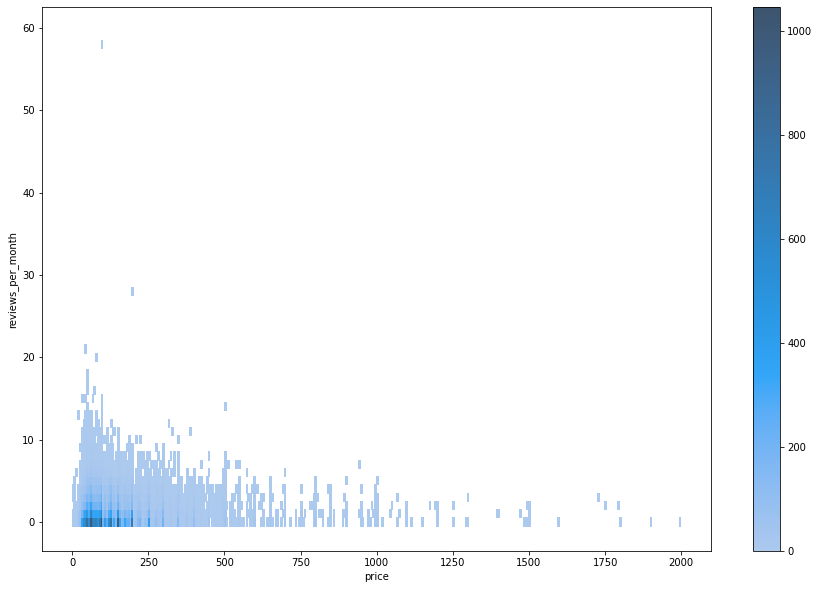

<Figure size 1080x720 with 0 Axes>

In [41]:
plt.rcParams['figure.figsize'] = (15,10)
sns.histplot(data=price_review, x='price', y='reviews_per_month', discrete=(False,True), cbar=True).set
plt.figure(figsize=(15,10))

**Inference**

* Most reviews are between price range 0 to 250 which tells us that people prefer renting rooms in the low price range. 

* It is visible through the graph that the price range is inversely proportional to the number of reviews. This means the number of reviews decreases when the price is increased. And a number of reviews increases when the price is decreased.

# **Relation Between Prices and Night Stayed**

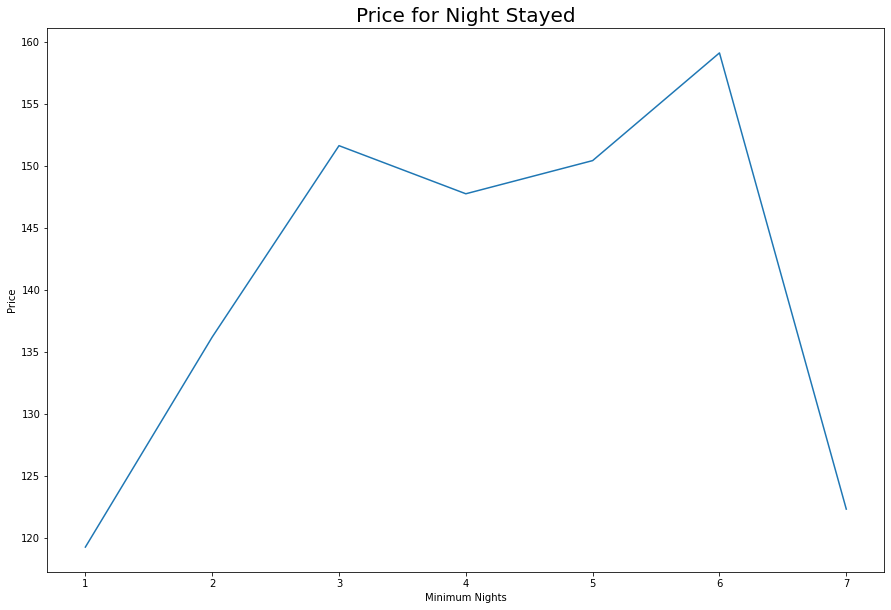

In [47]:
plt.figure(figsize=(15,10))
price_for_min_nights = df[(df['minimum_nights']<=7) & (df['price'])]
sns.lineplot(data=price_for_min_nights, x='minimum_nights', y='price', err_style='band', ci=None)
plt.title("Price for Night Stayed",fontsize=20)
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()

**Inference**

The above graph shows that price and night stay are inversely proportional to each other. It means one has to pay more when staying for fewer days and the price will decrease if the night stay is longer.

# **Relation Between Reviews Per Month and Minimum Night Stay**

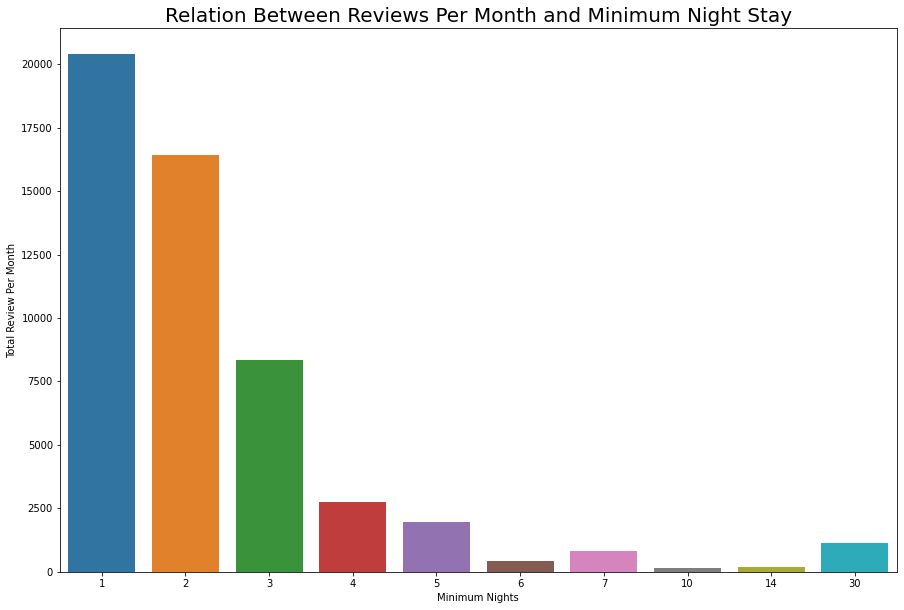

In [48]:
review_min_nights = df.groupby('minimum_nights').agg({'reviews_per_month':'sum'}).reset_index().sort_values(['reviews_per_month'],ascending=False)[:10]
plt.figure(figsize=(15,10))
sns.barplot(data=review_min_nights, x='minimum_nights', y='reviews_per_month')
plt.title("Relation Between Reviews Per Month and Minimum Night Stay",fontsize=20)
plt.xlabel('Minimum Nights')
plt.ylabel('Total Review Per Month')
plt.show()

**Inference**

The graph tells that a minimum night stay provides a maximum number of reviews. Especially those who stay for 1 day or 2 days provide a maximum number of reviews.

# **Conclusion**

1.   People are more attracted to lower prices.
2.   One has to pay more when staying for fewer days and the price will decrease if the night stay is longer.
3.   Minimum night stay provides a maximum number of reviews.
4.   There are some property which has a price listed as zero which is quite unusual.
5.   Most of the Prices are ranging between 0 to 1000.
6.   The Entire Home/Apartment has the highest share.